<a href="https://colab.research.google.com/github/phuongnpn/nlp/blob/main/Chapter_5_Mining_Text_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mining the Social Web

## Mining Text Files

This Jupyter Notebook provides an interactive way to follow along with and explore the examples from the book or video series. The intent behind this notebook is to reinforce the concepts in a fun, convenient, and effective way.

## Cleaning HTML in Google+ content by stripping out HTML tags and converting HTML entities back to plain-text representations

In [1]:
!pip install beautifulsoup4

In [2]:
from bs4 import BeautifulSoup # pip install beautifulsoup4

def cleanHtml(html):
    if html == "": return ""

    return BeautifulSoup(html, 'html5lib').get_text()

txt = "Don&#39;t forget about HTML entities and <strong>markup</strong> when "+\
      "mining text!<br />"

print(cleanHtml(txt))

Don't forget about HTML entities and markup when mining text!


## Sample data structures used in illustrations for the rest of this chapter

In [3]:
corpus = {
 'a' : "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 'b' : "Professor Plum has a green plant in his study.",
 'c' : "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
}
terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ],
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
 }
terms

{'a': ['mr.',
  'green',
  'killed',
  'colonel',
  'mustard',
  'in',
  'the',
  'study',
  'with',
  'the',
  'candlestick.',
  'mr.',
  'green',
  'is',
  'not',
  'a',
  'very',
  'nice',
  'fellow.'],
 'b': ['professor',
  'plum',
  'has',
  'a',
  'green',
  'plant',
  'in',
  'his',
  'study.'],
 'c': ['miss',
  'scarlett',
  'watered',
  'professor',
  "plum's",
  'green',
  'plant',
  'while',
  'he',
  'was',
  'away',
  'from',
  'his',
  'office',
  'last',
  'week.']}

## Running TF-IDF on sample data

In [4]:
from math import log

# Enter in a query term from the corpus variable
QUERY_TERMS = ['mr.', 'green']

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        return doc.count(term.lower()) / float(len(doc))
    else:
        return doc.count(term.lower()) / 1.0

def idf(term, corpus):
    num_texts_with_term = len([True for text in corpus if term.lower()
                              in text.lower().split()])

    # tf-idf calc involves multiplying against a tf value less than 0, so it's
    # necessary to return a value greater than 1 for consistent scoring.
    # (Multiplying two values less than 1 returns a value less than each of
    # them.)

    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0

def tf_idf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

corpus = \
    {'a': 'Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.',
     'b': 'Professor Plum has a green plant in his study.',
     'c': "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."}

for (k, v) in sorted(corpus.items()):
    print(k, ':', v)
print()

# Score queries by calculating cumulative tf_idf score for each term in query

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        print('TF({0}): {1}'.format(doc, term), tf(term, corpus[doc]))
    print('IDF: {0}'.format(term), idf(term, corpus.values()))
    print()

    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        print('TF-IDF({0}): {1}'.format(doc, term), score)
        query_scores[doc] += score
    print()

print("Overall TF-IDF scores for query '{0}'".format(' '.join(QUERY_TERMS)))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

a : Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
b : Professor Plum has a green plant in his study.
c : Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.

TF(a): mr. 0.10526315789473684
TF(b): mr. 0.0
TF(c): mr. 0.0
IDF: mr. 2.09861228866811

TF-IDF(a): mr. 0.22090655670190631
TF-IDF(b): mr. 0.0
TF-IDF(c): mr. 0.0

TF(a): green 0.10526315789473684
TF(b): green 0.1111111111111111
TF(c): green 0.0625
IDF: green 1.0

TF-IDF(a): green 0.10526315789473684
TF-IDF(b): green 0.1111111111111111
TF-IDF(c): green 0.0625

Overall TF-IDF scores for query 'mr. green'
a 0.3261697145966431
b 0.1111111111111111
c 0.0625


## Exploring text data with NLTK

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
# Explore some of NLTK's functionality by exploring the data.
# Here are some suggestions for an interactive interpreter session.

import json
import nltk

# Download ancillary nltk packages if not already installed
nltk.download('stopwords')

# Load in human language data from wherever you've saved it
DATA = 'ch05-timoreilly.json'
data = json.loads(open(DATA).read())

# Combine titles and post content
all_content = " ".join([ i['title'] + " " + i['content'] for i in data ])

# Approximate bytes of text
print(len(all_content))

tokens = all_content.split()
text = nltk.Text(tokens)

# Examples of the appearance of the word "open"
text.concordance("open")

# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

# Frequency analysis for words of interest
fdist = text.vocab()
print(fdist["open"])
print(fdist["source"])
print(fdist["web"])
print(fdist["2.0"])

# Number of words in the text
print('Number of tokens:', len(tokens))

# Number of unique words in the text
print('Number of unique words:', len(fdist.keys()))

# Common words that aren't stopwords
print('Common words that aren\'t stopwords')
print([w for w in list(fdist.keys())[:100]
   if w.lower() not in nltk.corpus.stopwords.words('english')])

# Long words that aren't URLs
print('Long words that aren\'t URLs')
print([w for w in fdist.keys() if len(w) > 15 and 'http' not in w])

# Number of URLs
print('Number of URLs: ',len([w for w in fdist.keys() if 'http' in w]))

# Top 10 Most Common Words
print('Top 10 Most Common Words')
print(fdist.most_common(100))

131031
Displaying 16 of 16 matches:
, and how at least one team is using open source to let others see inside the 
ear that computational biologist and open science advocate (UC Berkeley profes
ear that computational biologist and open science advocate (UC Berkeley profes
: magazine slogan say, "If you can't open it, you don't own it." Predictive po
 I'm proud to be a signatory to this open letter calling for this key policy i
st, I've focused a lot on areas like open source software and the implications
opic at greater length in my article Open Data and Algorithmic Regulation: htt
cessful participatory projects, from open source software to wikis to social m
ere isn't one (except that it's only open to US students - sorry. If anyone ha
new contract that conformed with the open data mandate. If it were consistent 
If it were consistent with the Obama open data guidance, that RFP would requir
ut of step with the administration’s open data policy.The founder of Hipcamp, 
is is a really i

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Querying text data with TF-IDF

In [9]:
import json
import nltk

# Provide your own query terms here

QUERY_TERMS = ['Government']

# Load in human language data from wherever you've saved it
DATA = 'ch05-timoreilly.json'
data = json.loads(open(DATA).read())

activities = [post['content'].lower().split()
              for post in data
                if post['content'] != ""]

# TextCollection provides tf, idf, and tf_idf abstractions so
# that we don't have to maintain/compute them ourselves

tc = nltk.TextCollection(activities)

relevant_activities = []

for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tc.tf_idf(term, activities[idx])
    if score > 0:
        relevant_activities.append({'score': score, 'title': data[idx]['title']})

# Sort by score and display results

relevant_activities = sorted(relevant_activities,
                             key=lambda p: p['score'], reverse=True)
for activity in relevant_activities:
    print('Title: {0}'.format(activity['title']))
    print('Score: {0}'.format(activity['score']))
    print()

Title: Totally hilarious and spot-on. Has to be the best public service video ever done by a government office...
Score: 0.10660131264074077

Title: Excellent set of principles for digital government. Echoes those put forward by the UK Government and...
Score: 0.10250126215455843

Title: "We need to show every American competent government services they can actually use, services that treat...
Score: 0.09517974342923281

Title: If you're interested about the emerging startup ecosystem around government transformation (a $172 Billion...
Score: 0.09189768331098341

Title: I'm proud to be a judge for the new +Code for America tech awards. If you are doing something remarkable...
Score: 0.08737812511536129

Title: This is a wonderful analysis of a set of anti-patterns in enterprise software development. While it ...
Score: 0.057935496000402584

Title: Fundraiser for Libby Schaaf for Mayor of Oakland at the BlueSprout industrial co working space. Oakland...
Score: 0.057935496000402584

Titl

## Finding similar documents using cosine similarity

The dot product of two vectors __A__ and **B** can be thought of as a projection of one vector into the other.
<img src="resources/ch05-textfiles/dot_product.png">

By measuring how much of **A** is in the same direction as **B**, we get a measure of how similar **A** is to **B**. The idea behind the following exercise is to create vectors for each document in our corpus consisting of the TF-IDF scores of the terms in those documents:

```
v_1 = [ tf_idf(term_1, doc_1), tf_idf(term_2, doc_1), ..., tf_idf(term_n, doc_1) ]
v_2 = [ tf_idf(term_1, doc_2), tf_idf(term_2, doc_2), ..., tf_idf(term_n, doc_2) ]
```

The dot product of these vectors:

$\mathbf{v_1} \cdot \mathbf{v_2} = |\mathbf{v_1}||\mathbf{v_2}|\cos(\theta)$.

Now you see where the cosine comes in. The "cosine distance" between $\mathbf{v1}$ and $\mathbf{v2}$ is then given by

$$
d = 1 - \frac{\mathbf{v_1} \cdot \mathbf{v_2}}{|\mathbf{v_1}||\mathbf{v_2}|}
$$

In [10]:
import json
import nltk
import nltk.cluster

# Load in human language data from wherever you've saved it
DATA = 'ch05-timoreilly.json'
data = json.loads(open(DATA).read())

all_posts = [ (i['title'] + " " + i['content']).lower().split() for i in data ]

# Provides tf, idf, and tf_idf abstractions for scoring

tc = nltk.TextCollection(all_posts)

# Compute a term-document matrix such that td_matrix[doc_title][term]
# returns a tf-idf score for the term in the document

td_matrix = {}
for idx in range(len(all_posts)):
    post = all_posts[idx]
    fdist = nltk.FreqDist(post)

    doc_title = data[idx]['title'].replace('\n', '')
    td_matrix[doc_title] = {}

    for term in fdist.keys():
        td_matrix[doc_title][term] = tc.tf_idf(term, post)

# Build vectors such that term scores are in the same positions...
distances = {}
for title1 in td_matrix.keys():

    distances[title1] = {}
    (min_dist, most_similar) = (1.0, ('', ''))

    for title2 in td_matrix.keys():

        # Take care not to mutate the original data structures
        # since we're in a loop and need the originals multiple times

        terms1 = td_matrix[title1].copy()
        terms2 = td_matrix[title2].copy()

        # Fill in "gaps" in each map so vectors of the same length can be computed
        for term1 in terms1:
            if term1 not in terms2:
                terms2[term1] = 0

        for term2 in terms2:
            if term2 not in terms1:
                terms1[term2] = 0

        # Create vectors from term maps
        v1 = [score for (term, score) in sorted(terms1.items())]
        v2 = [score for (term, score) in sorted(terms2.items())]

        # Compute similarity amongst documents
        distances[title1][title2] = nltk.cluster.util.cosine_distance(v1, v2)

        if title1 == title2:
            #print distances[title1][title2]
            continue

        if distances[title1][title2] < min_dist:
            (min_dist, most_similar) = (distances[title1][title2], title2)

    print(u'Most similar (score: {})\n{}\n{}\n'.format(1-min_dist, title1,
                                                       most_similar))

Most similar (score: 0.0971495885458028)
This is an excellent account of how the competitive dynamics are shifting in Lyft's favor in its ride...
As Jason Tanz of Wired, who urged me to write this piece, summarized its argument: "Uber was the product...

Most similar (score: 0.09567029049269082)
Billionaire Nick Hanauer has some blistering advice for his fellow plutocrats on the left. If you want...
Nick Hanauer is so quotable. He talks “Trickle down clowns,” wage suppression, and corporate welfare...

Most similar (score: 0.11319350317462973)
Cheryl Platz, former senior UX designer on Amazon's Alexa platform team, recently spoke with O'Reilly...
My thoughts on conversational interfaces, and why Alexa is now the market leader. If Siri, Google Now...

Most similar (score: 0.15556848369037235)
Brett Goldstein gives some excellent advice on basic security hygiene. It the most obvious cure for ...
Worried about predictive policing? This profile of Civicscape and its co-founder Brett Goldst

## Generating a figure to visually display the cosine similarity between documents

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
%matplotlib inline

max_articles = 15

# Get the titles - the keys to the 'distances' dict
keys = list(distances.keys())

# Extract the article titles
titles = [l[:40].replace('\n',' ')+'...' for l in list(distances.keys())]

n_articles = len(titles) if len(titles) < max_articles else max_articles

# Initialize the matrix of appropriate size to store similarity scores
similarity_matrix = np.zeros((n_articles, n_articles))

# Loop over the cells in the matrix
for i in range(n_articles):
    for j in range(n_articles):
        # Retrieve the cosine distance between articles i and j
        d = distances[keys[i]][keys[j]]

        # Store the 'similarity' between articles i and j, defined as 1.0 - distance
        similarity_matrix[i, j] = 1.0 - d


# Create a figure and axes
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(111)

# Visualize the matrix with colored squares indicating similarity
ax.matshow(similarity_matrix, cmap='Greys', vmin = 0.0, vmax = 0.2)

# Set regular ticks, one for each article in the collection
ax.set_xticks(range(n_articles))
ax.set_yticks(range(n_articles))

# Set the tick labels as the article titles
ax.set_xticklabels(titles)
ax.set_yticklabels(titles)

# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90);
'''

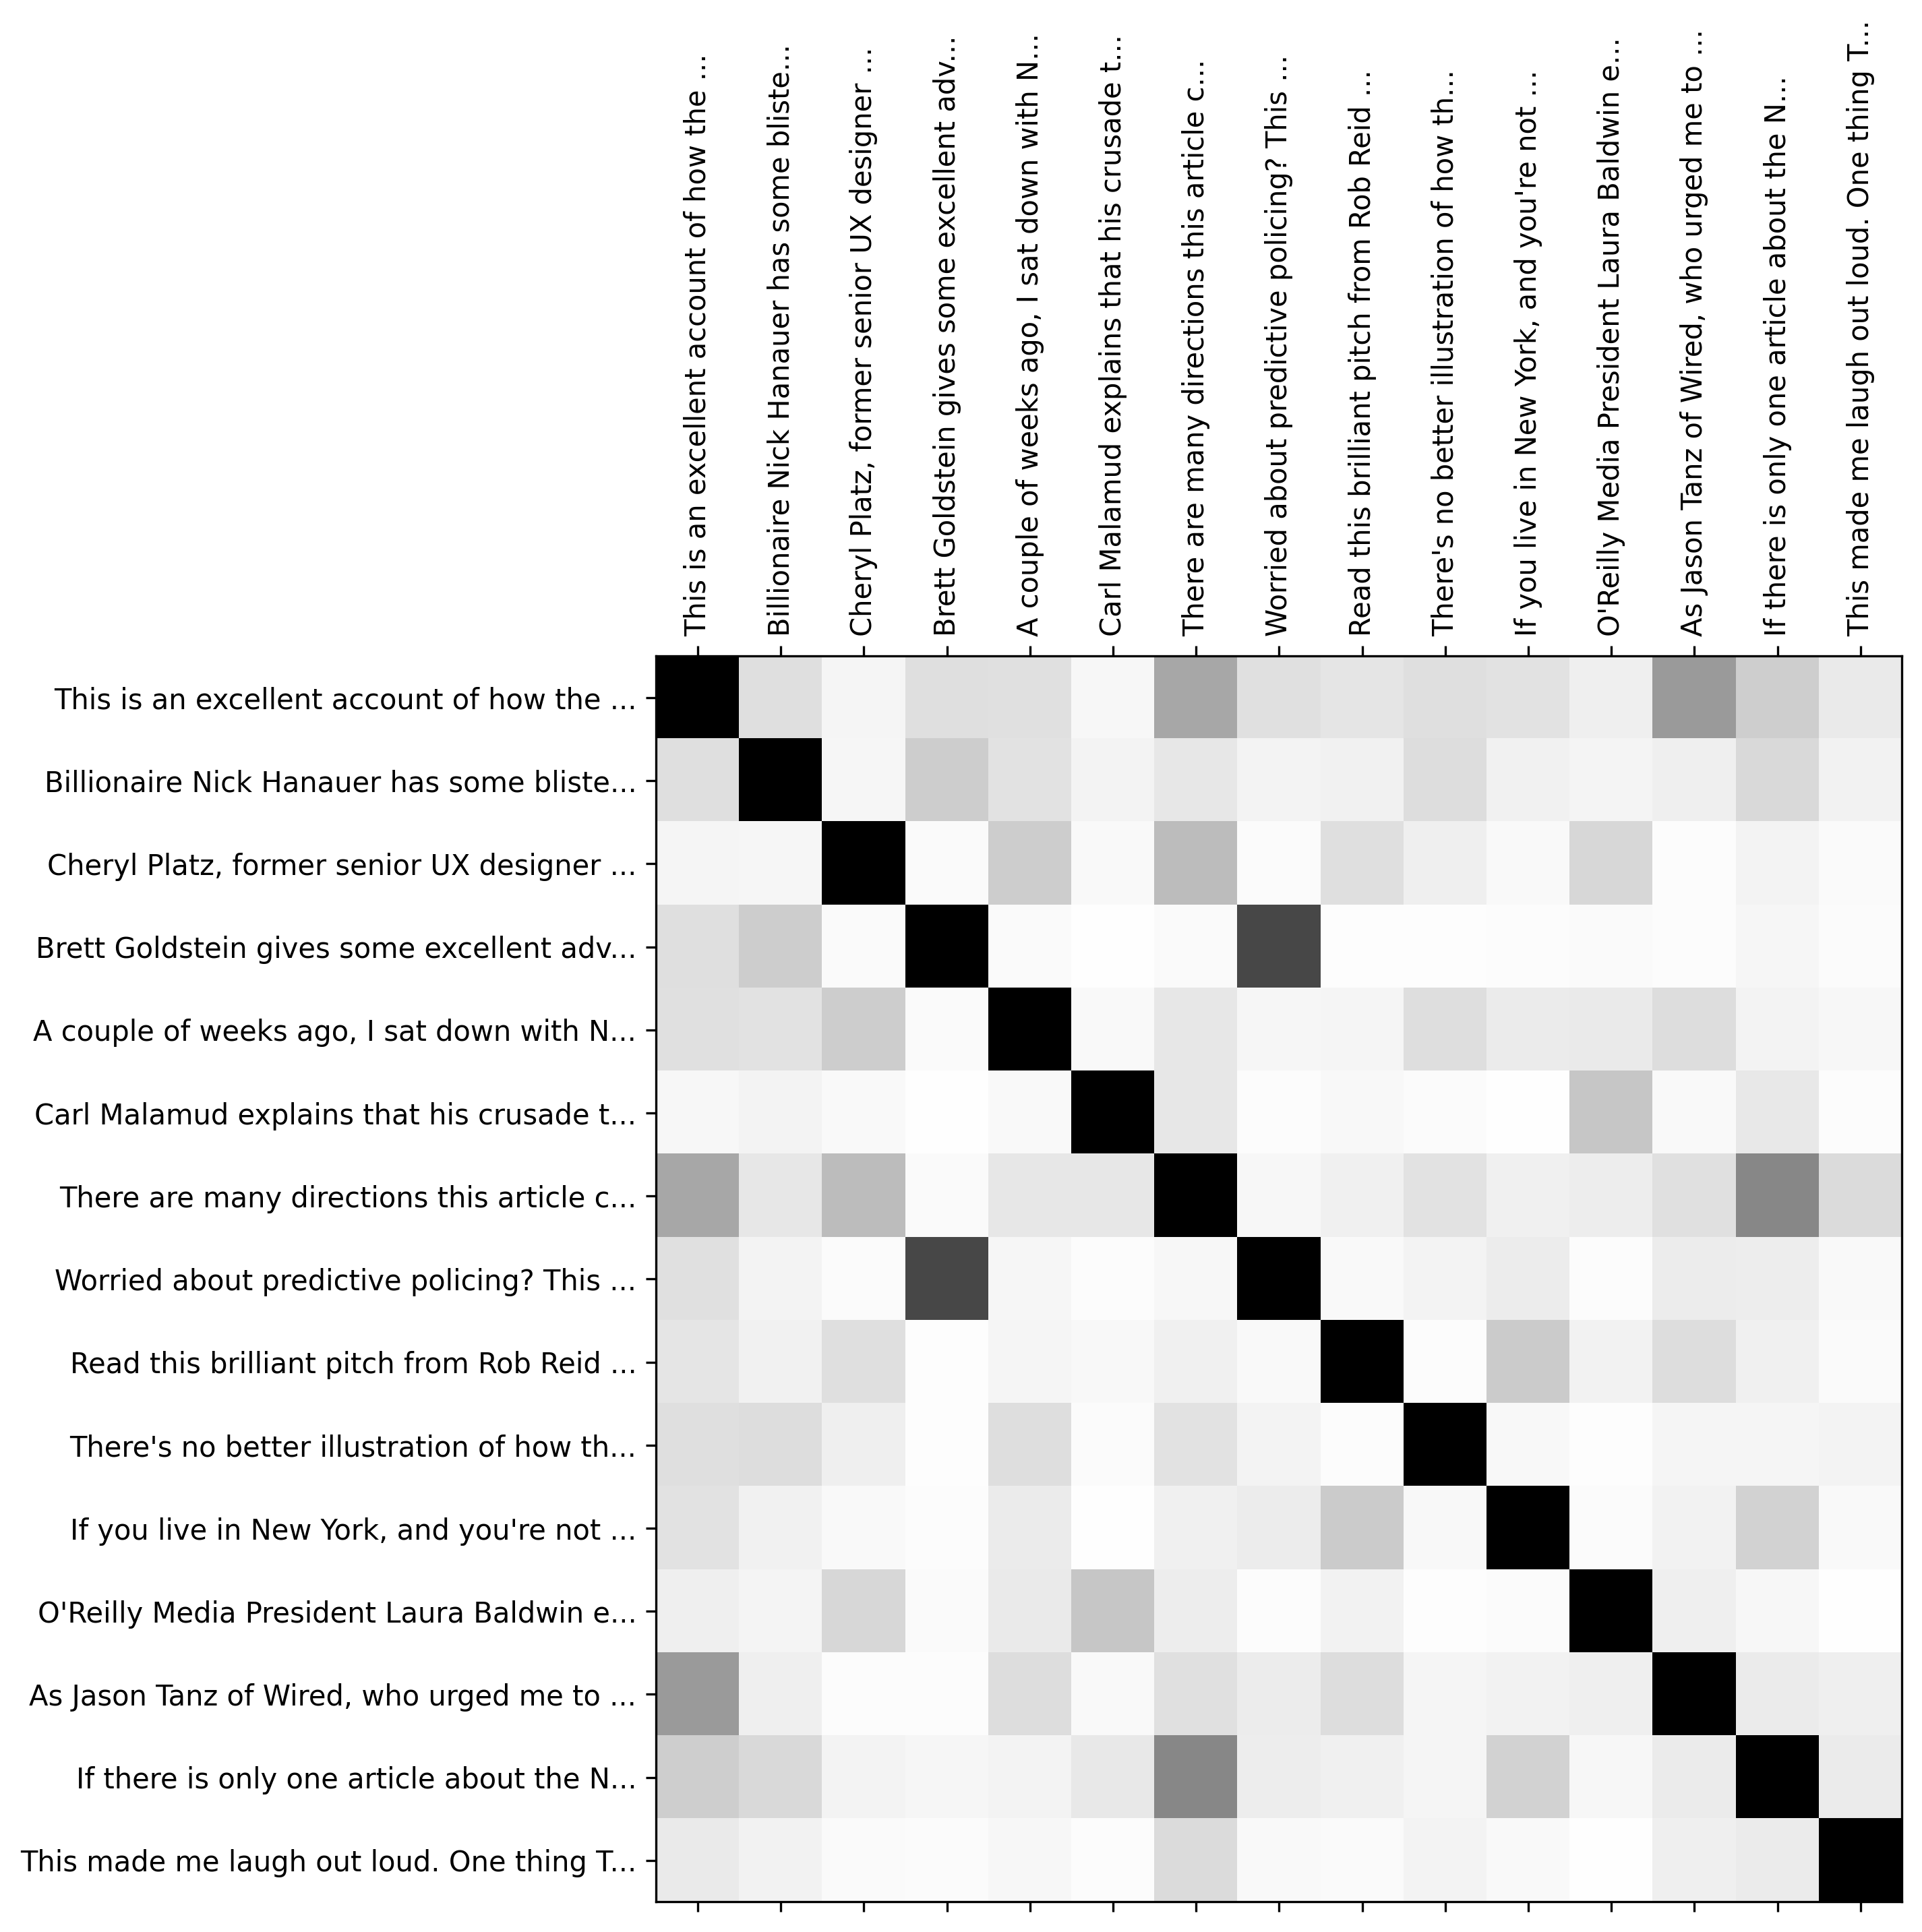

In [15]:
import numpy as np
import matplotlib.pyplot as plt # pip install matplotlib
%matplotlib inline

max_articles = 15

# Get the titles - the keys to the 'distances' dict
keys = list(distances.keys())

# Extract the article titles, limiting to the number of articles to be displayed
titles = [l[:40].replace('\n',' ')+'...' for l in list(distances.keys())[:max_articles]]

n_articles = len(titles) if len(titles) < max_articles else max_articles

# Initialize the matrix of appropriate size to store similarity scores
similarity_matrix = np.zeros((n_articles, n_articles))

# Loop over the cells in the matrix
for i in range(n_articles):
    for j in range(n_articles):
        # Retrieve the cosine distance between articles i and j
        d = distances[keys[i]][keys[j]]

        # Store the 'similarity' between articles i and j, defined as 1.0 - distance
        similarity_matrix[i, j] = 1.0 - d


# Create a figure and axes
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(111)

# Visualize the matrix with colored squares indicating similarity
ax.matshow(similarity_matrix, cmap='Greys', vmin = 0.0, vmax = 0.2)

# Set regular ticks, one for each article in the collection
ax.set_xticks(range(n_articles))
ax.set_yticks(range(n_articles))

# Set the tick labels as the article titles
ax.set_xticklabels(titles) # The titles list now has the correct number of labels.
ax.set_yticklabels(titles) # The titles list now has the correct number of labels.

# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90);

## Using NLTK to compute bigrams and collocations for a sentence

In [16]:
import nltk

sentence = "Mr. Green killed Colonel Mustard in the study with the " + \
           "candlestick. Mr. Green is not a very nice fellow."

print([bg for bg in nltk.ngrams(sentence.split(), 2)])
txt = nltk.Text(sentence.split())

txt.collocations()


[('Mr.', 'Green'), ('Green', 'killed'), ('killed', 'Colonel'), ('Colonel', 'Mustard'), ('Mustard', 'in'), ('in', 'the'), ('the', 'study'), ('study', 'with'), ('with', 'the'), ('the', 'candlestick.'), ('candlestick.', 'Mr.'), ('Mr.', 'Green'), ('Green', 'is'), ('is', 'not'), ('not', 'a'), ('a', 'very'), ('very', 'nice'), ('nice', 'fellow.')]
Mr. Green


## Using NLTK to compute collocations in a similar manner to the nltk.Text.collocations demo functionality

In [18]:
import json
import nltk
from nltk.metrics import association

# Load in human language data from wherever you've saved it
DATA = 'ch05-timoreilly.json'
data = json.loads(open(DATA).read())

# Number of collocations to find

N = 25

all_tokens = [token for post in data for token in post['content'].lower().split()]

finder = nltk.BigramCollocationFinder.from_words(all_tokens)
finder.apply_freq_filter(2)
finder.apply_word_filter(lambda w: w in nltk.corpus.stopwords.words('english'))
scorer = association.BigramAssocMeasures.jaccard
collocations = finder.nbest(scorer, N)

for collocation in collocations:
    c = ' '.join(collocation)
    print(c)

bottom, “copyright
brett goldstein
cabo pulmo
nbc press:here
nick hanauer
press:here tv
wood fired
yuval noah
child welfare
silicon valley
+jennifer pahlka
barre historical
computational biologist
drm-free ebooks
mikey dickerson
saul griffith
bay mini
credit card
east bay
on-demand economy,
white house
inca trail
italian granite
private sector
weeks ago,
